In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
 
data_train = pd.read_csv("./data/train.csv", sep = ",")
data_train=data_train.drop(['id'], axis=1) 
data_train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
0,0.106643,3.59437,132.8040,3.18428,0.081971,1.18859,3.73238,2.266270,2.09959,0.012330,...,1.09862,0.013331,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0.240496,0
1,0.125021,1.67336,76.5336,3.37825,0.099400,5.09366,1.27562,-0.471318,4.54594,0.037706,...,3.46017,0.017054,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0.024719,0
2,0.036330,1.49747,233.5460,2.19435,0.026914,3.12694,5.05687,3.849460,1.80187,0.056995,...,4.88300,0.085222,0.032396,0.116092,-0.001689,-0.520069,2.14112,0.124464,0.148209,0
3,-0.014077,0.24600,779.9670,1.89064,0.006948,1.53112,2.69800,4.517330,4.50332,0.123494,...,3.47439,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0.044873,0
4,-0.003259,3.71542,156.1280,2.14772,0.018284,2.09859,4.15492,-0.038236,3.37145,0.034166,...,1.91059,-0.042943,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,0.072798,1


In [2]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns = 'target'), data_train['target'], 
                                                    test_size = 0.25, random_state = 0)

X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

In [3]:
znormalizer = StandardScaler()
num_cols = X_train.select_dtypes(['integer', 'float']).columns

znormalizer.fit(X_train[num_cols])
X_train_norm = pd.DataFrame(znormalizer.transform(X_train[num_cols]), columns = num_cols)
X_test_norm = pd.DataFrame(znormalizer.transform(X_test[num_cols]), columns = num_cols)

In [35]:
logit = LogisticRegression(C=0.001, max_iter = 2000, fit_intercept=False, solver = 'newton-cg', penalty='l2')
logit.fit(X_train_norm, y_train)

y_hat_train_logit = logit.predict(X_train_norm)
y_hat_test_logit = logit.predict(X_test_norm)

precision_train_logit = precision_score(y_train, y_hat_train_logit) * 100
precision_test_logit = precision_score(y_test, y_hat_test_logit) * 100

recall_train_logit = recall_score(y_train, y_hat_train_logit) * 100
recall_test_logit = recall_score(y_test, y_hat_test_logit) * 100

f1_score_train_logit=f1_score(y_train, y_hat_train_logit) * 100
f1_score_test_logit=f1_score(y_test, y_hat_test_logit) * 100

auc_score_train_logit = roc_auc_score(y_train, y_hat_train_logit) * 100
auc_score_test_logit = roc_auc_score(y_test, y_hat_test_logit) * 100

print("Precision = {:.2f}% , recall = {:.2f}% and f1_score={:.2f}% of the Logistic Regression Model on the training data.".format(precision_train_logit, recall_train_logit, f1_score_train_logit))
print("Precision = {:.2f}% , recall = {:.2f}% and f1_score={:.2f}% of the Logistic Regression Model on the validation data.".format(precision_test_logit, recall_test_logit, f1_score_test_logit))
print("ROC_AUC Score = {:.2f}%  of Logistic Regression Model on the training data.".format(auc_score_train_logit))
print("ROC_AUC Score = {:.2f}%  of Logistic Regression Model on the validation data.".format(auc_score_test_logit))


Precision = 74.25% , recall = 73.39% and f1_score=73.82% of the Logistic Regression Model on the training data.
Precision = 74.16% , recall = 73.34% and f1_score=73.75% of the Logistic Regression Model on the validation data.
ROC_AUC Score = 73.63%  of Logistic Regression Model on the training data.
ROC_AUC Score = 73.66%  of Logistic Regression Model on the validation data.


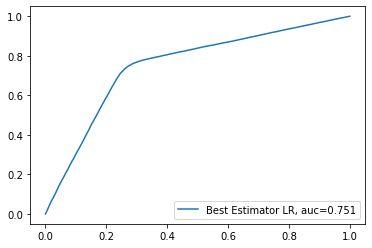

In [36]:
y_hat_test_proba_lr = logit.predict_proba(X_train_norm)[::,1]
y_hat_test_proba_lr = logit.predict_proba(X_test_norm)[::,1]

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,  y_hat_test_proba_lr)

auc_lr = round(roc_auc_score(y_test, y_hat_test_proba_lr),4)

plt.plot(fpr_lr,tpr_lr,label="Best Estimator LR, auc="+str(auc_lr))
plt.legend(loc=4)
plt.show()

In [39]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

estimator_LR = LogisticRegression()

parameters_LR = {
    'C': (0.0001, 0.001, 0.01, 0.1),
    'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    'penalty': ['l2'],
    'fit_intercept': (True, False),
    'max_iter': (1000, 2000, 4000)
}

grid_search_LR = HalvingGridSearchCV(
    estimator=estimator_LR,
    param_grid=parameters_LR,
    factor=2,
    scoring='roc_auc',
    n_jobs=-1,
    cv = 5,
    verbose=10,
    min_resources=5000,
#    max_resources=50000,
    random_state=0
)

In [40]:
import warnings
warnings.filterwarnings('ignore')


grid_search_LR.fit(X_train_norm, y_train)

print(grid_search_LR.best_score_)
print(grid_search_LR.best_params_)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 5000
max_resources_: 450000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 120
n_resources: 5000
Fitting 5 folds for each of 120 candidates, totalling 600 fits
----------
iter: 1
n_candidates: 60
n_resources: 10000
Fitting 5 folds for each of 60 candidates, totalling 300 fits
----------
iter: 2
n_candidates: 30
n_resources: 20000
Fitting 5 folds for each of 30 candidates, totalling 150 fits
----------
iter: 3
n_candidates: 15
n_resources: 40000
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 4
n_candidates: 8
n_resources: 80000
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 5
n_candidates: 4
n_resources: 160000
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 320000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
0.7483658774162611
{'C': 0.001, 'fit_i

In [41]:
y_hat_train_grid = grid_search_LR.best_estimator_.predict(X_train_norm)
y_hat_test_grid = grid_search_LR.best_estimator_.predict(X_test_norm)

precision_train_logit_grid = precision_score(y_train, y_hat_train_grid) * 100
precision_test_logit_grid = precision_score(y_test, y_hat_test_grid) * 100

recall_train_logit_grid = recall_score(y_train, y_hat_train_grid) * 100
recall_test_logit_grid = recall_score(y_test, y_hat_test_grid) * 100

f1_score_train_logit_grid=f1_score(y_train, y_hat_train_grid) * 100
f1_score_test_logit_grid=f1_score(y_test, y_hat_test_grid) * 100

auc_score_train_logit_grid = roc_auc_score(y_train, y_hat_train_grid) * 100
auc_score_test_logit_grid = roc_auc_score(y_test, y_hat_test_grid) * 100

print("Precision = {:.2f}% , recall = {:.2f}% and f1_score={:.2f}% of the Logistic Regression Model on the training data.".format(precision_train_logit_grid, recall_train_logit_grid, f1_score_train_logit))
print("Precision = {:.2f}% , recall = {:.2f}% and f1_score={:.2f}% of the Logistic Regression Model on the validation data.".format(precision_test_logit_grid, recall_test_logit_grid, f1_score_test_logit_grid))
print("ROC_AUC Score = {:.2f}%  of Logistic Regression Model on the training data.".format(auc_score_train_logit_grid))
print("ROC_AUC Score = {:.2f}%  of Logistic Regression Model on the validation data.".format(auc_score_test_logit_grid))


Precision = 74.25% , recall = 73.39% and f1_score=73.82% of the Logistic Regression Model on the training data.
Precision = 74.16% , recall = 73.34% and f1_score=73.75% of the Logistic Regression Model on the validation data.
ROC_AUC Score = 73.63%  of Logistic Regression Model on the training data.
ROC_AUC Score = 73.66%  of Logistic Regression Model on the validation data.


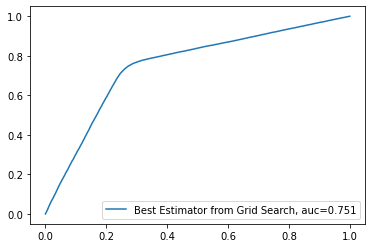

In [43]:
best_model= LogisticRegression(C=grid_search_LR.best_params_['C'], 
                solver=grid_search_LR.best_params_['solver'], 
                penalty=grid_search_LR.best_params_['penalty'], 
                fit_intercept=grid_search_LR.best_params_['fit_intercept'],
                max_iter=grid_search_LR.best_params_['max_iter']
                )

best_model.fit(X_train_norm, y_train)


y_hat_test_proba_grid = best_model.predict_proba(X_train_norm)[::,1]
y_hat_test_proba_grid = best_model.predict_proba(X_test_norm)[::,1]

fpr_grid, tpr_grid, threshold_grid = roc_curve(y_test,  y_hat_test_proba_grid)

auc_lr = round(roc_auc_score(y_test, y_hat_test_proba_grid),4)

plt.plot(fpr_grid,tpr_grid,label="Best Estimator from Grid Search, auc="+str(auc_lr))
plt.legend(loc=4)
plt.show()

In [44]:
data_test = pd.read_csv("./data/test.csv", sep = ",")

In [50]:
data_test_norm = pd.DataFrame(znormalizer.transform(data_test[num_cols]), columns = num_cols)

test_predict = best_model.predict_proba(data_test_norm)[::,1]
test_predict=test_predict.astype(float)
array=np.array(test_predict).tolist()
df=pd.DataFrame(data_test['id'])
df['id'] = df['id'].astype(int)
df['target'] = np.array(array)
df.to_csv('Tab-Nov-2021.csv', sep=',', encoding='utf-8', index=False)